In [43]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
data = pd.read_csv('../dataset/cars.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [45]:
data = tf.constant(data.values, dtype=tf.float32)
data = tf.random.shuffle(data)

target = data[:, -1]
data = data[:, 1:-1]

target = tf.expand_dims(target, -1)
print(data.shape)
print("Data", data)
print(target.shape)
print("Price", target)

(1000, 10)
Data tf.Tensor(
[[6.71058e+05 8.43316e+05 5.00000e+00 ... 1.56000e+02 8.40000e+01
  1.32000e+02]
 [6.52175e+05 7.56878e+05 3.00000e+00 ... 1.90000e+02 1.15000e+02
  1.40000e+02]
 [6.91439e+05 7.51561e+05 5.00000e+00 ... 1.41000e+02 7.30000e+01
  9.70000e+01]
 ...
 [6.36836e+05 7.37079e+05 4.00000e+00 ... 1.70000e+02 1.15000e+02
  6.80000e+01]
 [5.78865e+05 7.38976e+05 5.00000e+00 ... 1.70000e+02 1.11000e+02
  1.04000e+02]
 [5.24970e+05 8.45639e+05 6.00000e+00 ... 1.82000e+02 9.50000e+01
  9.30000e+01]], shape=(1000, 10), dtype=float32)
(1000, 1)
Price tf.Tensor(
[[439639.5]
 [320008. ]
 [186356.5]
 [327994. ]
 [248738. ]
 [315959. ]
 [128632.5]
 [170960.5]
 [324899.5]
 [279833.5]
 [295406.5]
 [243006.5]
 [274357.5]
 [427590. ]
 [ 71314. ]
 [227845.5]
 [230080. ]
 [299645. ]
 [ 61928.5]
 [217562. ]
 [221692. ]
 [122139.5]
 [175810. ]
 [316652. ]
 [172462. ]
 [334502. ]
 [405505. ]
 [245854.5]
 [224745. ]
 [432951.5]
 [393351. ]
 [390305.5]
 [418934. ]
 [201188.5]
 [459686.5]


In [46]:
TRAIN_RATIO = 0.7
VALIDARION_RATIO = 0.15
TEST_RATIO = 0.15
DATA_SIZE = len(data)

train_size = int(DATA_SIZE * TRAIN_RATIO)
validation_size = int(DATA_SIZE * VALIDARION_RATIO)
test_size = int(DATA_SIZE * TEST_RATIO)

train_data = data[:train_size]
validation_data = data[train_size:train_size + validation_size]
test_data = data[train_size + validation_size:]

train_target = target[:train_size]
validation_target = target[train_size:train_size + validation_size]
test_target = target[train_size + validation_size:]

In [47]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(data)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(data.shape[1],)),
    normalizer,

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)])

model.compile(
    loss="huber", 
    optimizer="Adam",
    metrics=["root_mean_squared_error"])

fit_result = model.fit(
    train_data,
    train_target,
    validation_data=(validation_data, validation_target),
    epochs=100, 
    verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 309058.5000 - root_mean_squared_error: 333418.6875 - val_loss: 312007.5625 - val_root_mean_squared_error: 337643.8750
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304850.1562 - root_mean_squared_error: 330331.7188 - val_loss: 312006.6250 - val_root_mean_squared_error: 337643.0000
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 303872.6875 - root_mean_squared_error: 328095.5938 - val_loss: 312003.3750 - val_root_mean_squared_error: 337639.9375
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 309067.1562 - root_mean_squared_error: 333643.9375 - val_loss: 311992.2188 - val_root_mean_squared_error: 337629.4062
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 304314.7812 - root_mean_squared_error: 328230.0312 - val_loss: 311958.9375 - val_root_mean_squared_error: 337597.6562
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 307273.4375 - root_mean_squared_error: 332217.0312 - va

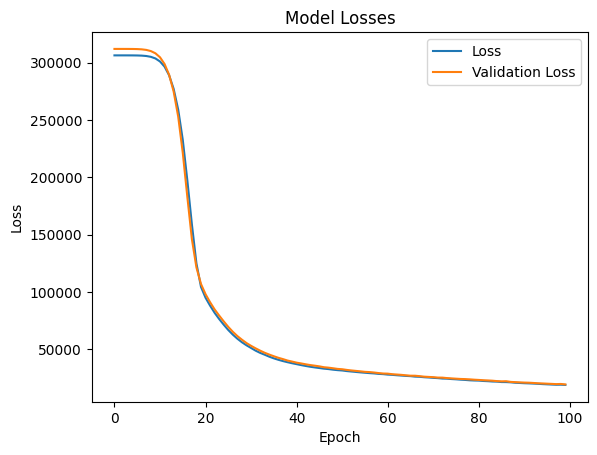

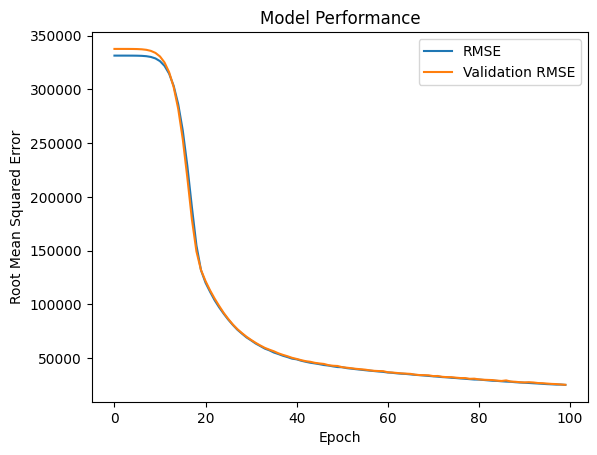

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19045.6406 - root_mean_squared_error: 24798.6113 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19505.2695 - root_mean_squared_error: 25569.2383 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


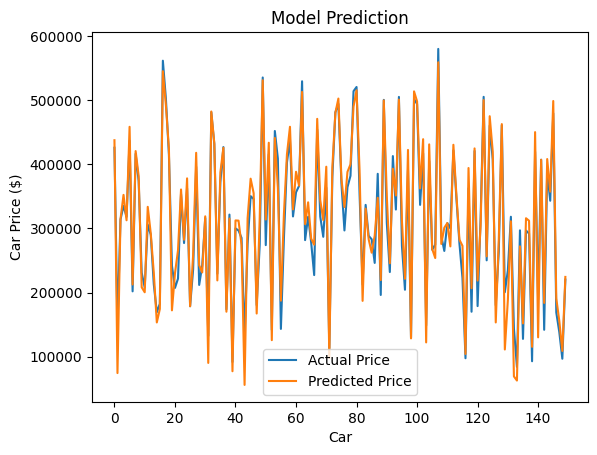

In [48]:
# Plot for losses
plt.plot(fit_result.history["loss"])
plt.plot(fit_result.history["val_loss"])
plt.title("Model Losses")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Validation Loss"])
plt.show()

# Plot for the error
plt.plot(fit_result.history["root_mean_squared_error"])
plt.plot(fit_result.history["val_root_mean_squared_error"])
plt.title("Model Performance")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Epoch")
plt.legend(["RMSE", "Validation RMSE"])
plt.show()

# Model evaluation
model.evaluate(train_data, train_target)
model.evaluate(test_data, test_target)
car_price_predictions = list(model.predict(test_data)[:, 0])
car_price_actual = list(test_target[:, 0])

# Plotting the real and predicted car prices:
plt.plot(car_price_predictions)
plt.plot(car_price_actual)
plt.title("Model Prediction")
plt.ylabel("Car Price ($)")
plt.xlabel("Car")
plt.legend(["Actual Price", "Predicted Price"])
plt.show()